In [26]:
import json
import pandas as pd
# ib charge les données 
    
# Normalizing data

df = pd.read_json('./data/hotels2.json', orient='index')

In [27]:
df

,zone,pays,ville,eco
Anantara Sahara Tozeur Resort & Villas,Afrique,Tunisie,Tozeur,0
NH Bariloche Edelweiss,Amérique,Argentine,Bariloche,1
NH Buenos Aires 9 de Julio,Amérique,Argentine,Buenos Aires,1
NH Buenos Aires City,Amérique,Argentine,Buenos Aires,0
NH Buenos Aires Florida,Amérique,Argentine,Buenos Aires,0
...,...,...,...,...
NH London Kensington,Europe,Royaume-Uni,Londres,1
nhow London,Europe,Royaume-Uni,Londres,1
NH Geneva Airport,Europe,Suisse,Genève,1
NH Geneva City,Europe,Suisse,Genève,0


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [29]:
plt.rcParams.update({'font.size': 15})

# Chanegr la taille de police par défaut


In [30]:
df.count()

zone     356
pays     356
ville    356
eco      356
dtype: int64

In [31]:
group_zone = df.groupby('zone')
group_ville = df.groupby('ville')
group_pays = df.groupby('pays')
mean_df = df.mean()
print(mean_df)

eco    0.564607
dtype: float64


In [32]:
df1 = df.loc[df['eco'] == 0]
df1.count()

zone     155
pays     155
ville    155
eco      155
dtype: int64

In [33]:
df['eco'].sum(axis=0)
#on a compté le nombre d'hôtels éco-friendly en tout

201

In [34]:
non_eco = df.query('eco == "0" and pays =="Allemagne"')
print(len(non_eco))
#test de la requête

7


In [35]:
def prepare_comparaison_eco_non_eco (lieu) :
    df_lieux = df[lieu].unique()
    liste_lieux = list(df_lieux)
    nb_hotels_eco = []
    nb_hotels_non_eco = []
    for p in liste_lieux :
        query1 = 'eco == "0" and ' + lieu + '  == "' + p + '"'
        #print(query1)
        query2 = 'eco == "1" and ' + lieu + '  == "' + p + '"'
        non_eco = df.query(query1)
        oui_eco = df.query(query2)
        nb_hotels_eco.append(len(oui_eco))
        nb_hotels_non_eco.append(len(non_eco))
    return nb_hotels_eco, nb_hotels_non_eco, liste_lieux
#sert pour les graphes de comparaison




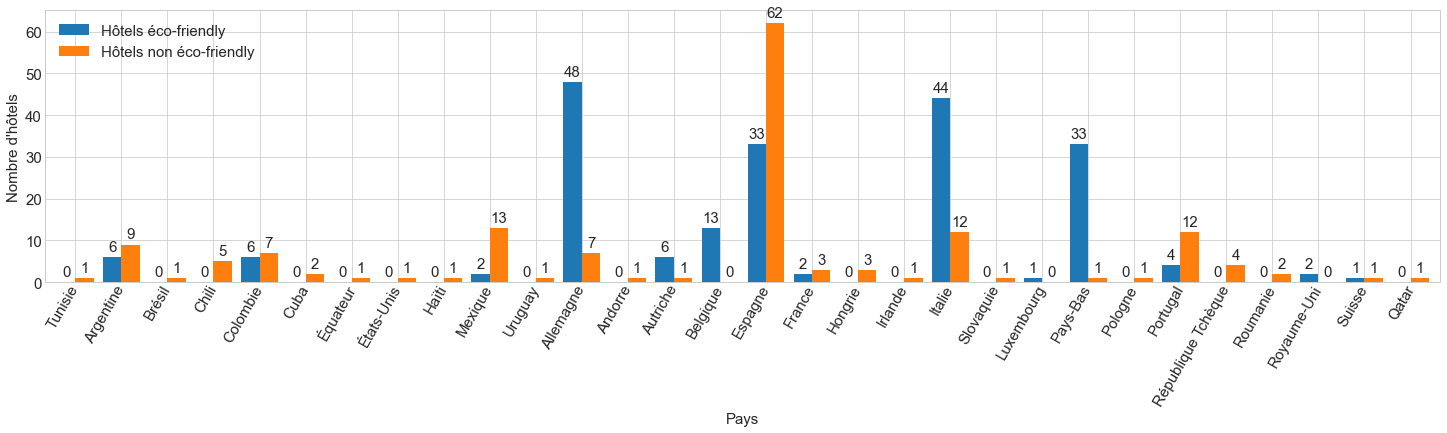

In [12]:
nb_hotels_eco, nb_hotels_non_eco, liste_pays =  prepare_comparaison_eco_non_eco('pays')

#Tracé de la comparaison  des rapports éco/ non éco entre pays

dft = pd.DataFrame({'Hôtels éco-friendly': nb_hotels_eco,
                   'Hôtels non éco-friendly': nb_hotels_non_eco}, index=liste_pays)
ax =  dft.plot.bar(figsize=(25, 5),rot=60, width= 0.8)
plt.xlabel("Pays")
plt.ylabel("Nombre d'hôtels")
#rotation et rester au milieu
plt.xticks(rotation=60, ha='right', va='center', rotation_mode='anchor')
plt.legend(loc='upper left')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

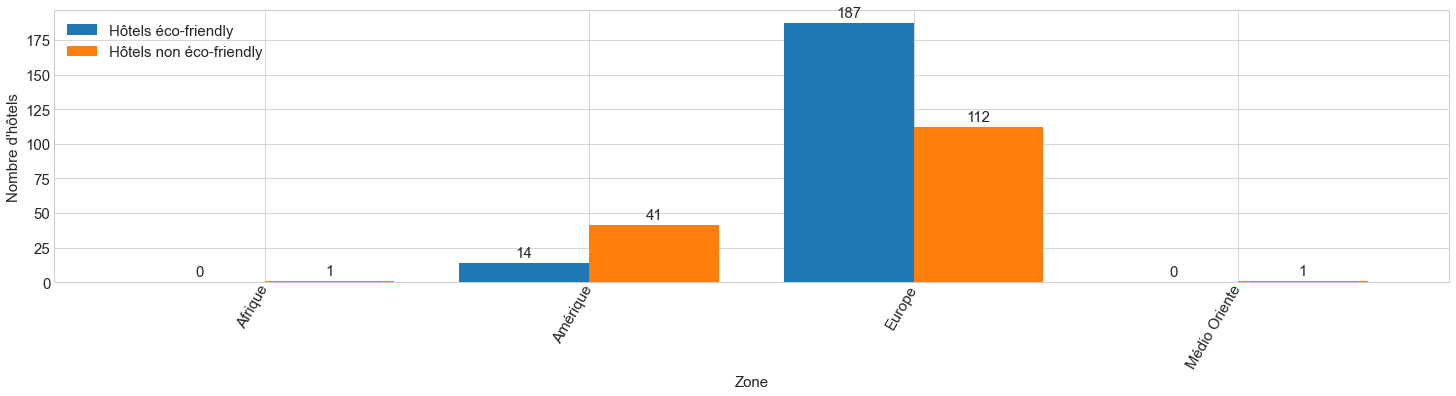

In [36]:
nb_hotels_eco, nb_hotels_non_eco, liste_zone =  prepare_comparaison_eco_non_eco('zone')

#Tracé de la comparaison  des rapports éco/ non éco entre pays

dft = pd.DataFrame({'Hôtels éco-friendly': nb_hotels_eco,
                   'Hôtels non éco-friendly': nb_hotels_non_eco}, index=liste_zone)
ax =  dft.plot.bar(figsize=(25, 5),rot=60, width= 0.8)
plt.xlabel("Zone")
plt.ylabel("Nombre d'hôtels")
#rotation et rester au milieu
plt.xticks(rotation=60, ha='right', va='center', rotation_mode='anchor')
plt.legend(loc='upper left')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [14]:
group_pays.count()



,zone,ville,eco
pays,,,
Allemagne,55,55,55
Andorre,1,1,1
Argentine,15,15,15
Autriche,7,7,7
Belgique,13,13,13
Brésil,1,1,1
Chili,5,5,5
Colombie,13,13,13
Cuba,2,2,2


In [37]:

group_pays.mean()


,eco
pays,
Allemagne,0.872727
Andorre,0.000000
Argentine,0.400000
Autriche,0.857143
Belgique,1.000000
Brésil,0.000000
Chili,0.000000
Colombie,0.461538
Cuba,0.000000


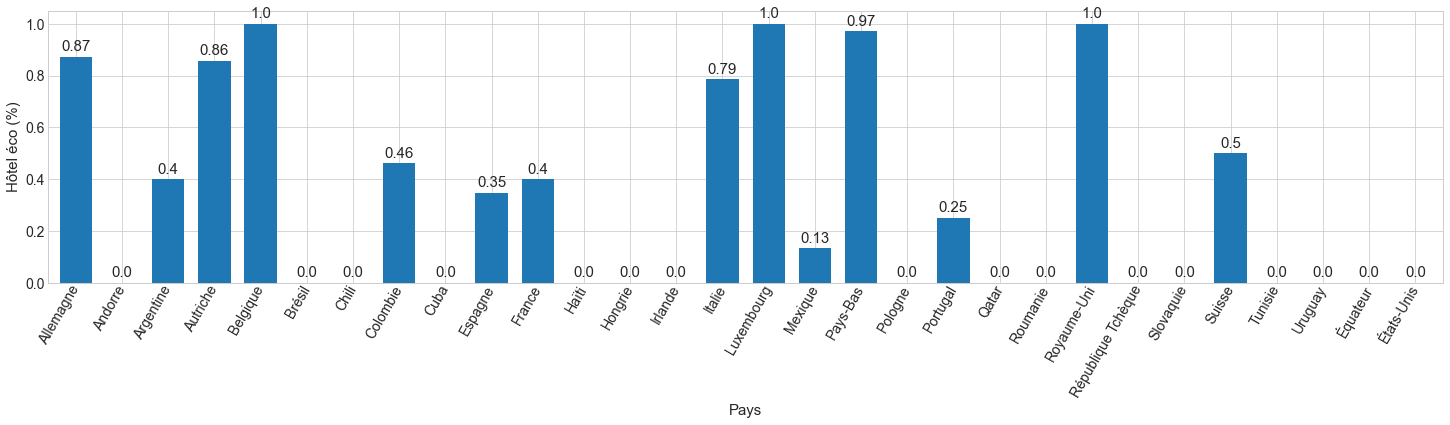

In [38]:
ax = group_pays.mean().plot.bar(figsize=(25, 5), width= 0.7, fontsize=14,legend=None)
plt.xlabel("Pays")
plt.ylabel("Hôtel éco (%)")
plt.xticks(rotation=60, ha='right', va='center', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [39]:

group_zone.count()



,pays,ville,eco
zone,,,
Afrique,1,1,1
Amérique,55,55,55
Europe,299,299,299
Médio Oriente,1,1,1


In [40]:
gz =group_zone.mean()
gz

,eco
zone,
Afrique,0.000000
Amérique,0.254545
Europe,0.625418
Médio Oriente,0.000000


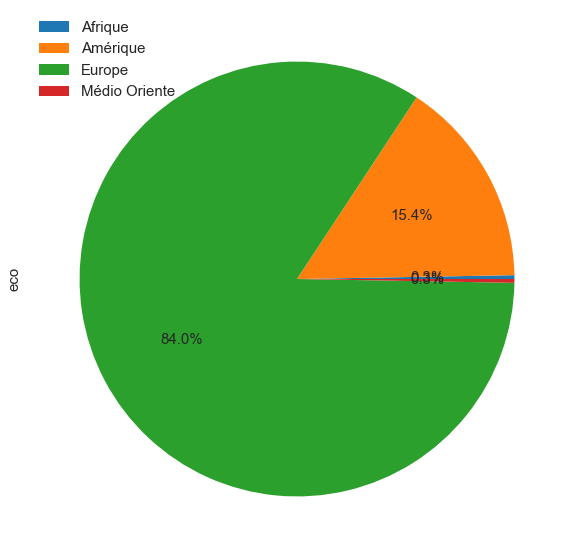

In [19]:

plot = group_zone.count().plot.pie(y='eco', figsize=(10, 10), autopct='%1.1f%%', fontsize=15, labels=None)

In [41]:
group_pays['eco'].count()

pays
Allemagne             55
Andorre                1
Argentine             15
Autriche               7
Belgique              13
Brésil                 1
Chili                  5
Colombie              13
Cuba                   2
Espagne               95
France                 5
Haïti                  1
Hongrie                3
Irlande                1
Italie                56
Luxembourg             1
Mexique               15
Pays-Bas              34
Pologne                1
Portugal              16
Qatar                  1
Roumanie               2
Royaume-Uni            2
République Tchèque     4
Slovaquie              1
Suisse                 2
Tunisie                1
Uruguay                1
Équateur               1
États-Unis             1
Name: eco, dtype: int64

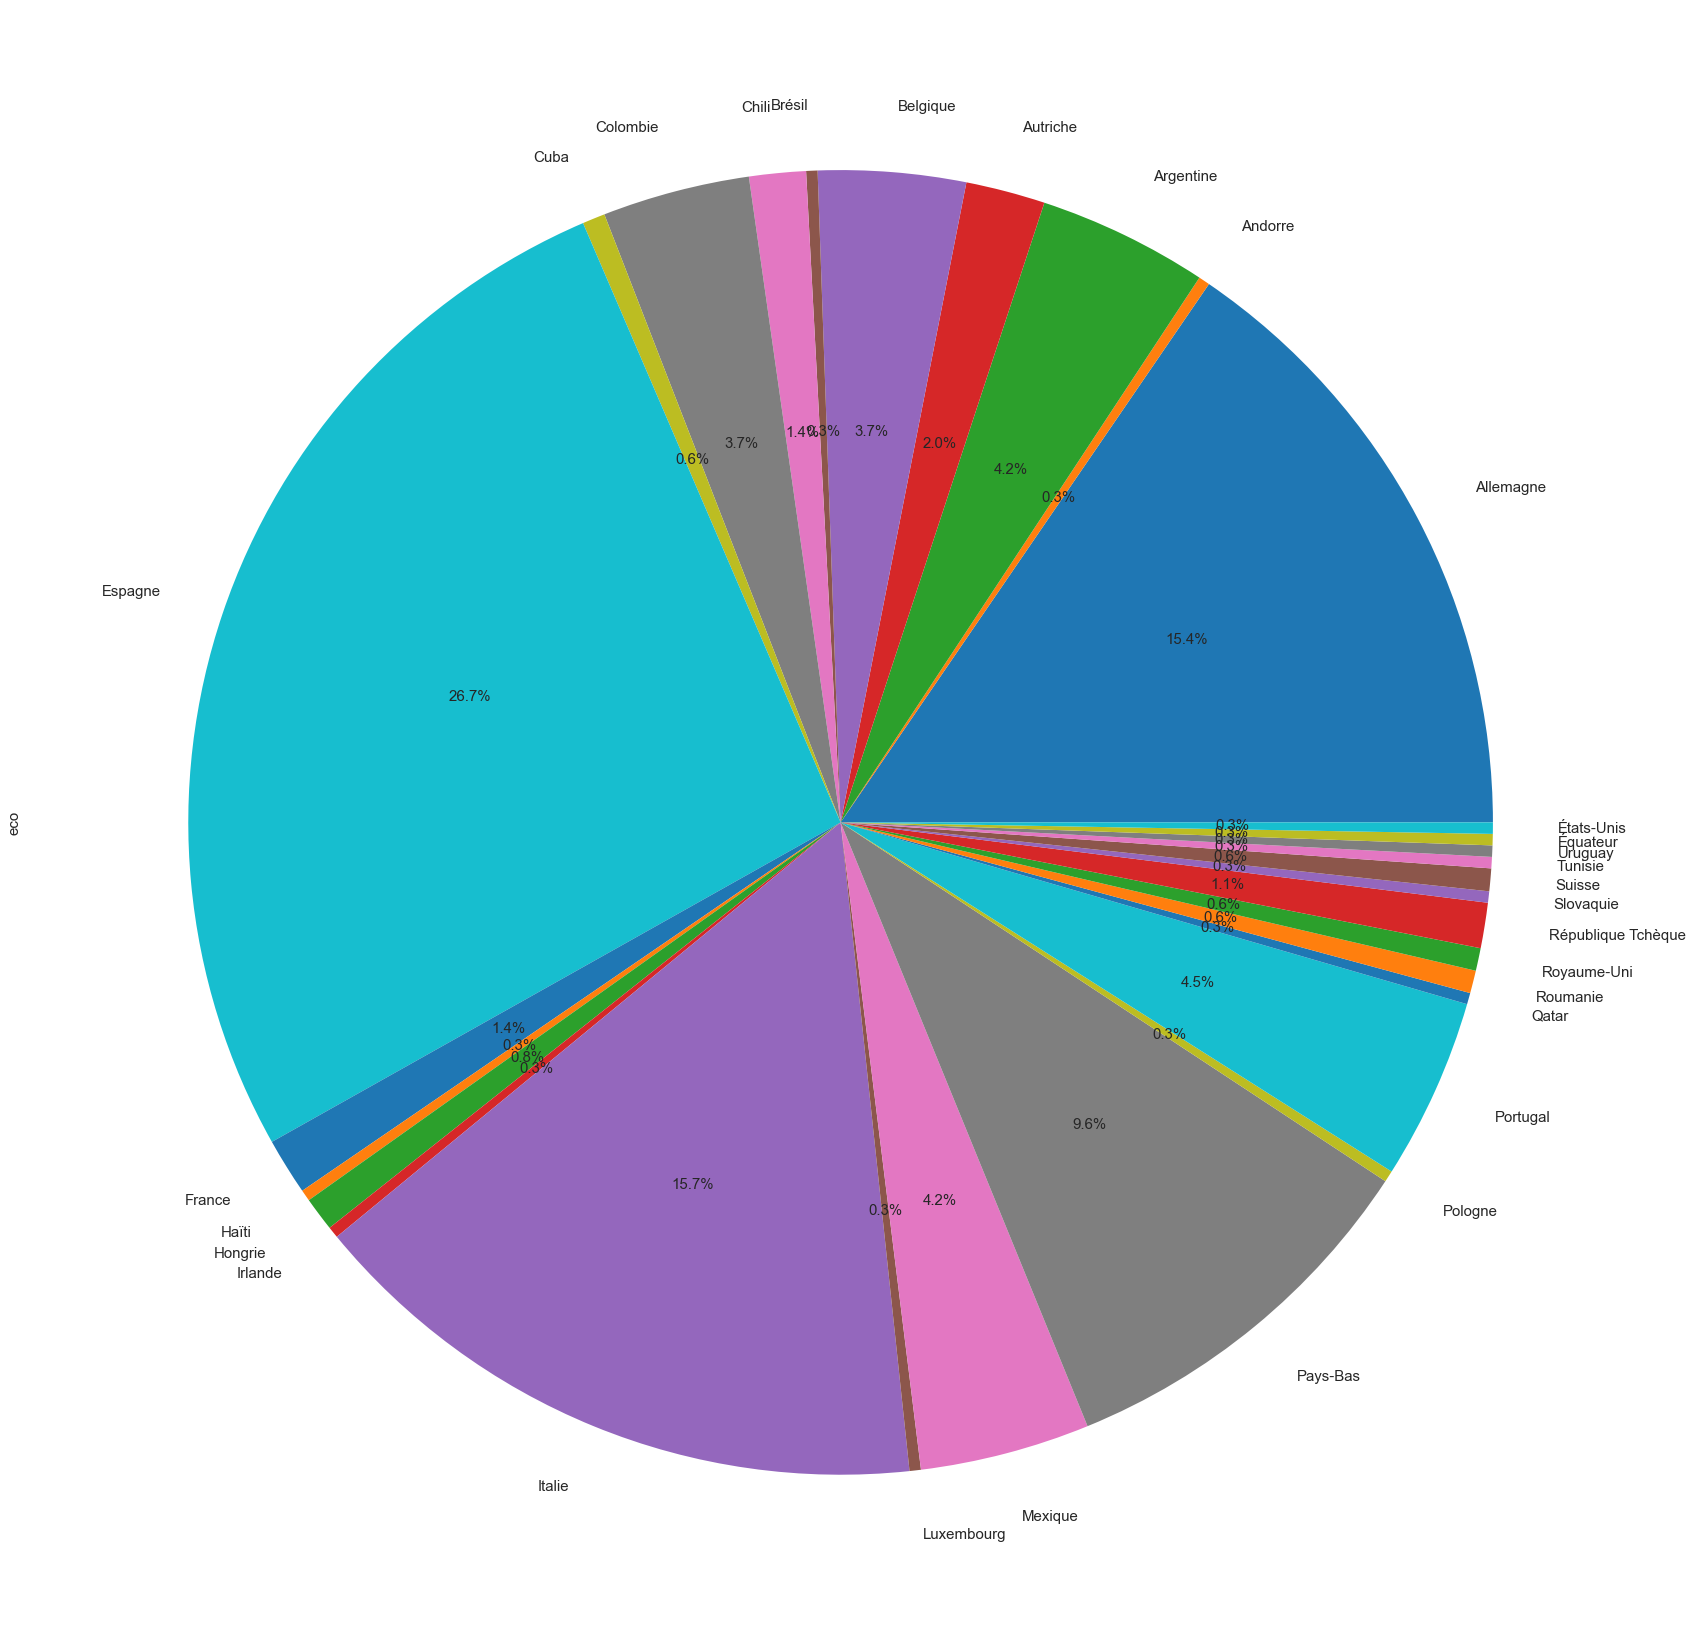

In [42]:
plot = group_pays.count().plot.pie(y ='eco',figsize=(30, 30), autopct='%1.1f%%', legend = False)

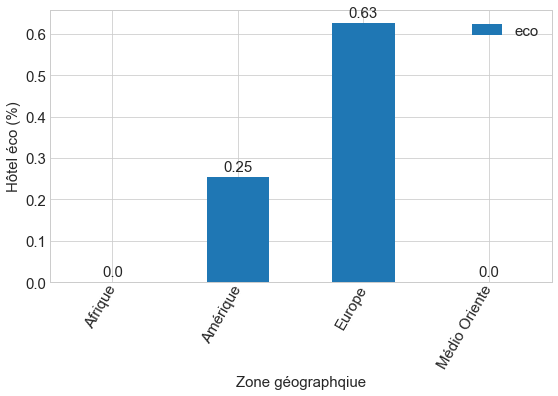

In [43]:

ax = gz.plot.bar(figsize=(9, 5),rot=45)
plt.xlabel("Zone géographqiue")
plt.ylabel("Hôtel éco (%)")
plt.xticks(rotation=60, ha='right', va='center', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [44]:

df['eco'].describe()['mean']

0.5646067415730337

In [45]:
df['eco'].mean()

0.5646067415730337

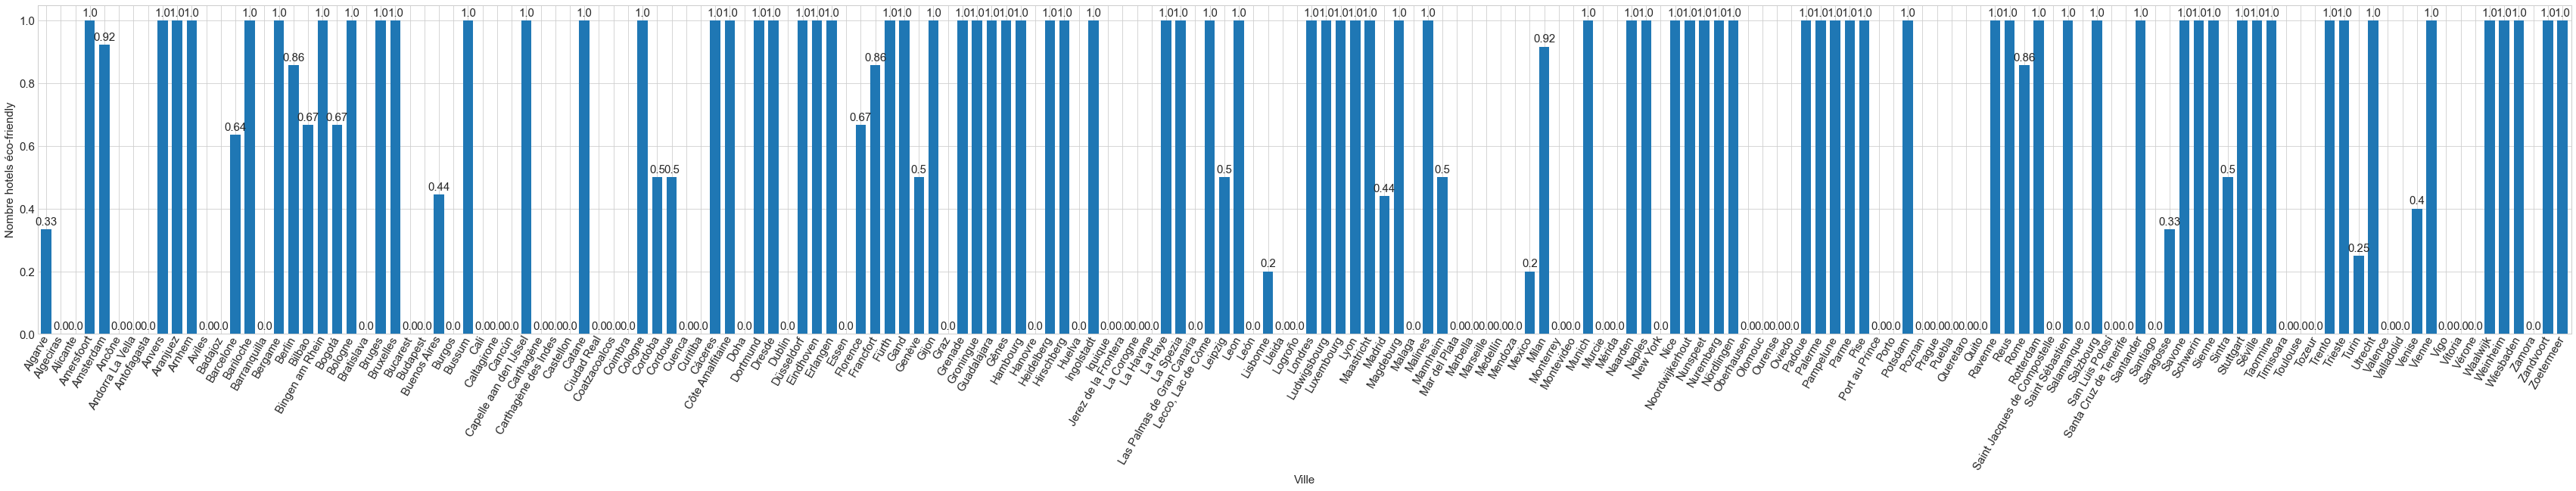

In [47]:
gvm = group_ville.mean()
ax = gvm.plot.bar(figsize=(60, 8),rot=30, width =0.7, legend=None)
plt.xlabel("Ville")
plt.ylabel("Nombre hotels éco-friendly")
plt.xticks(rotation=60, ha='right', va='center', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [48]:
df.loc[df['eco'] == 0]


,zone,pays,ville,eco
Anantara Sahara Tozeur Resort & Villas,Afrique,Tunisie,Tozeur,0
NH Buenos Aires City,Amérique,Argentine,Buenos Aires,0
NH Buenos Aires Florida,Amérique,Argentine,Buenos Aires,0
NH Buenos Aires Latino,Amérique,Argentine,Buenos Aires,0
NH Collection Buenos Aires Centro Histórico,Amérique,Argentine,Buenos Aires,0
...,...,...,...,...
NH Prague City,Europe,République Tchèque,Prague,0
NH Bucharest,Europe,Roumanie,Bucarest,0
NH Timisoara,Europe,Roumanie,Timisoara,0
NH Geneva City,Europe,Suisse,Genève,0


Partie ntealan : entrées du dictionnaire : 

In [49]:
df = pd.read_json('./data/ŋgəmba-français.json', orient='index')

In [50]:
df

,pos,prefix,suffix,audio,traduction-fr
mbâ,Nom (n.),m,,0,[marmite]
bə̀làsí,Nom (n.),,,0,[l' essence]
cɑ̀,Verbe (v.),,,0,"[planter, placer]"
cə̀nò,Nom (n.),,,0,[mensonge]
dá'nə́,Verbe (v.),,,0,[toucher]
dáp khúkhúp,Nom (n.),,,0,[coton]
dɑ́dámsí,Nom (n.),,,0,[macep]
də̀bá',Nom (n.),,,0,[tabac]
díʤɑ́,Verbe (v.),,,0,[rêver]
dìnjɛ̀,Nom (n.),,,0,[vieillard]


In [56]:
import glob

dic_df = {}
for name in glob.glob('./data/*'):
# nom est le nom du dico
    nom = name.split('.')[1].split('/')[-1]

    if not nom.startswith("ho") :
        print(f'Extrait du dictionnaire {nom} : ')
        dft = pd.read_json(name, orient='index')
        print(dft)


Extrait du dictionnaire oku-english : 
                    pos prefix suffix  audio traduction-fr
ba             Nom (n.)                    0      [father]
balack         Nom (n.)                    0       [white]
bef     Adjectif (adj.)                    0      [spoilt]
bɛmɛh        Verbe (v.)                    0   [to accept]
bɛnlɛh       Verbe (v.)                    0     [to turn]
bia            Nom (n.)                    0        [pear]
bihlɛn         Nom (n.)                    0   [groundnut]
ɛbok           Nom (n.)      ɛ             0       [melon]
bouh           Nom (n.)                    0         [dog]
buo            Nom (n.)                    0         [dog]
Extrait du dictionnaire duala-français : 
                           pos prefix suffix  audio  \
a               Pronom (pron.)                    0   
ā      Interjection (interj.)                    0   
aba                 Verbe (v.)                    0   
ába                Verbe (v.)                   